In [14]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split


In [38]:
# hand_ds = tf.data.experimental.make_csv_dataset(
#     'data.csv',
#     batch_size=5, # Artificially small to make examples easier to show.
#     label_name='label',
#     num_epochs=1,
#     ignore_errors=True,)
data_x = np.loadtxt("data.csv", delimiter=",", dtype=float, usecols=list(range(1, (21 * 2) + 1)))
data_y = np.loadtxt("data.csv", delimiter=",", dtype=float, usecols=(0))
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, train_size=0.75, random_state=69)

print(train_x.shape)

(267, 42)


In [52]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input((42,)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy())
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 64)                2752      
                                                                 
 dense_76 (Dense)            (None, 32)                2080      
                                                                 
 dense_77 (Dense)            (None, 16)                528       
                                                                 
 dense_78 (Dense)            (None, 8)                 136       
                                                                 
 dense_79 (Dense)            (None, 1)                 9         
                                                                 
Total params: 5,505
Trainable params: 5,505
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = model.fit(x=train_x,y=train_y,batch_size=5,shuffle=True,epochs=20)

Epoch 1/20
54/54 [==============================] - 1s 2ms/step - loss: 0.6443
Epoch 2/20
54/54 [==============================] - 0s 2ms/step - loss: 0.5218
Epoch 3/20
54/54 [==============================] - 0s 1ms/step - loss: 0.4308
Epoch 4/20
54/54 [==============================] - 0s 1ms/step - loss: 0.3597
Epoch 5/20
54/54 [==============================] - 0s 1ms/step - loss: 0.2859
Epoch 6/20
54/54 [==============================] - 0s 1ms/step - loss: 0.1794
Epoch 7/20
54/54 [==============================] - 0s 1ms/step - loss: 0.1026
Epoch 8/20
54/54 [==============================] - 0s 1ms/step - loss: 0.0729
Epoch 9/20
54/54 [==============================] - 0s 1ms/step - loss: 0.0504
Epoch 10/20
54/54 [==============================] - 0s 1ms/step - loss: 0.0414
Epoch 11/20
54/54 [==============================] - 0s 1ms/step - loss: 0.0445
Epoch 12/20
54/54 [==============================] - 0s 1ms/step - loss: 0.0266
Epoch 13/20
54/54 [==============================

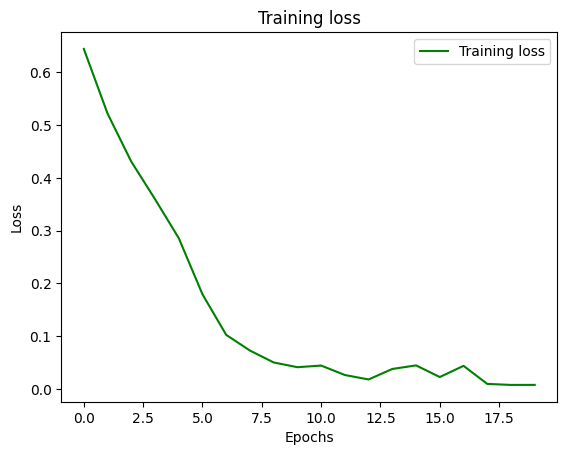

In [54]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history["loss"], 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [56]:
model.save("models/v1.h5")